In [10]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Import Dataset
zoo_df = pd.read_csv(r"C:\Users\sai\OneDrive\Documents\Zoo.csv")
class_df = pd.read_csv(r"C:\Users\sai\OneDrive\Documents\Zoo.csv")
zoo_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
class_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 2. Data Exploration

In [18]:
import pandas as pd

# Load your data into a DataFrame
animal_df = pd.read_csv(r"C:\Users\sai\OneDrive\Documents\Zoo.csv")

# Now you can drop unwanted columns
zoo = animal_df.drop(['animal name'], axis=1)
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
zoo.isnull().any()


hair        False
feathers    False
eggs        False
milk        False
airborne    False
aquatic     False
predator    False
toothed     False
backbone    False
breathes    False
venomous    False
fins        False
legs        False
tail        False
domestic    False
catsize     False
type        False
dtype: bool

In [20]:
zoo.isnull().sum()


hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

# 2.1 Descriptive Analysis


In [21]:
zoo.shape

(101, 17)

In [22]:
zoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [24]:
zoo[zoo.duplicated()]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
31,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [25]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [44]:
zoo["type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [30]:
list(zoo)

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

# 3. Data Visualization

<Axes: >

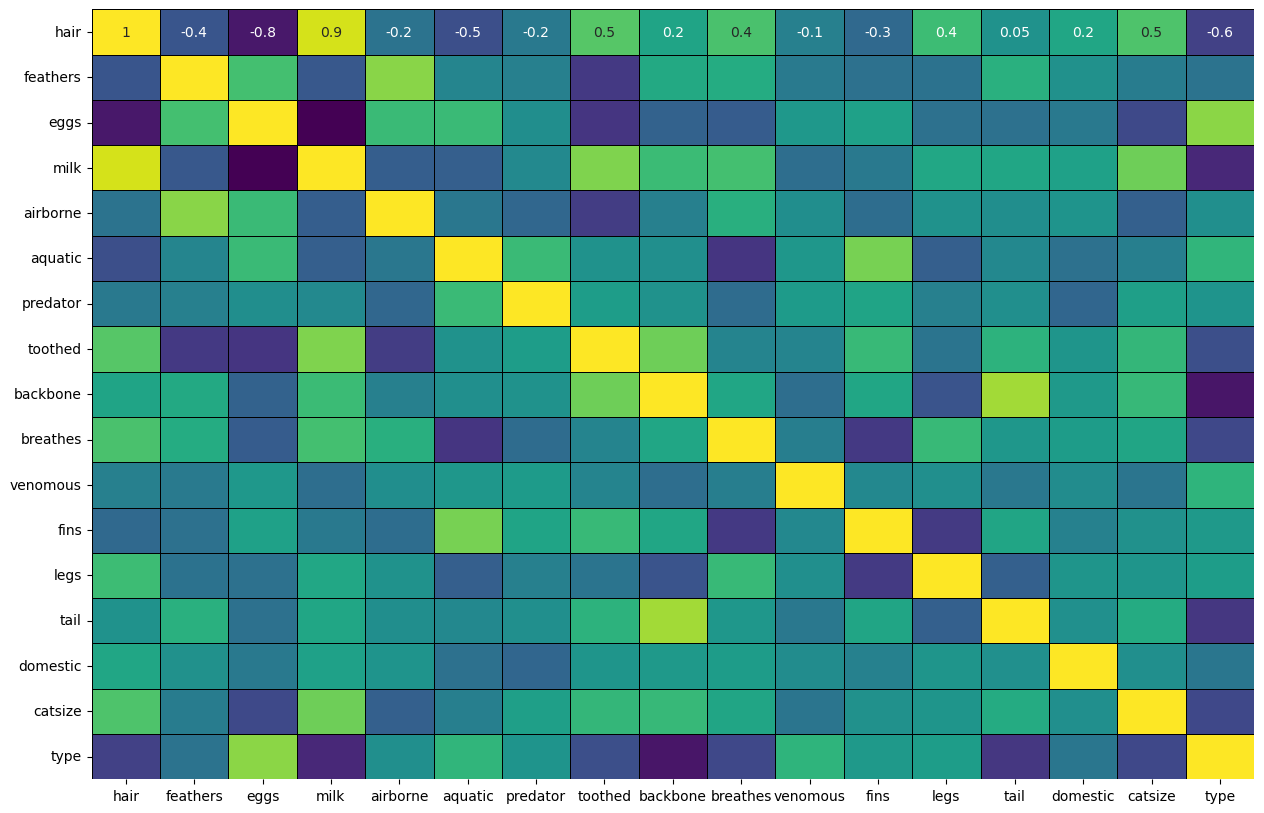

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


In [50]:
zoo_df = zoo.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)

# Check current column names
print(zoo_df.columns)

# Select columns (make sure to correct any typos or missing columns)
zoo_df = zoo_df[['hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize']]

zoo_df.head()

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type', 'has_legs'],
      dtype='object')


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1


Text(0.5, 1.0, 'Features for the Animals')

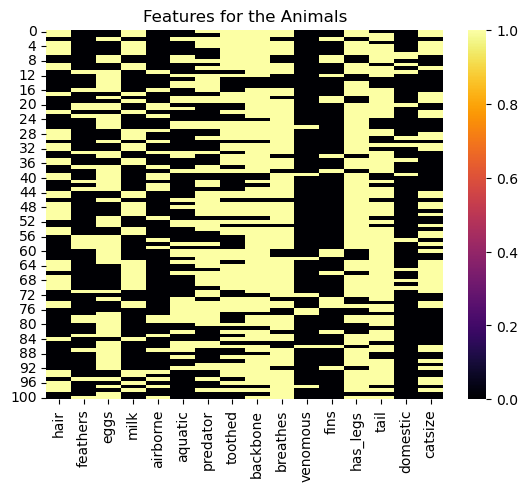

In [56]:
zoo_df_temp = zoo_df.drop(['legs'], axis=1)
zoo_df = zoo_df[['hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize']]
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

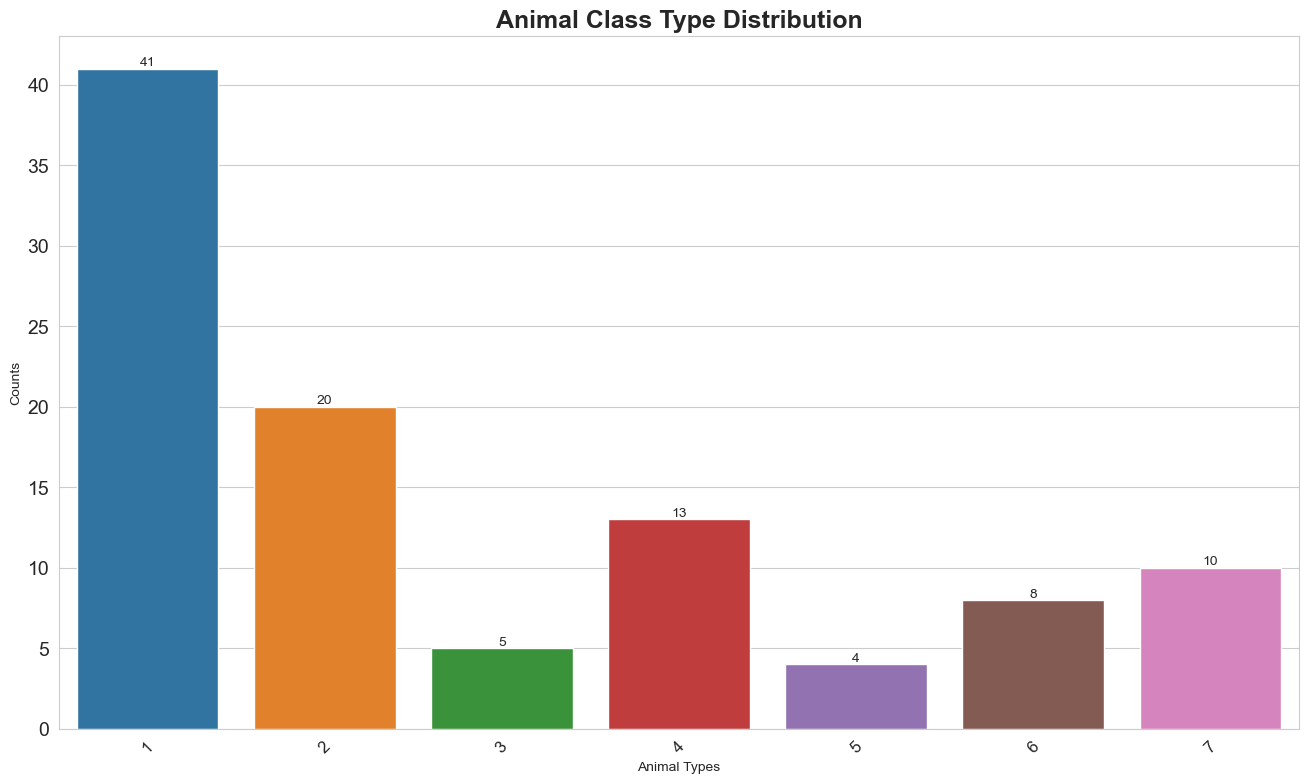

In [73]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

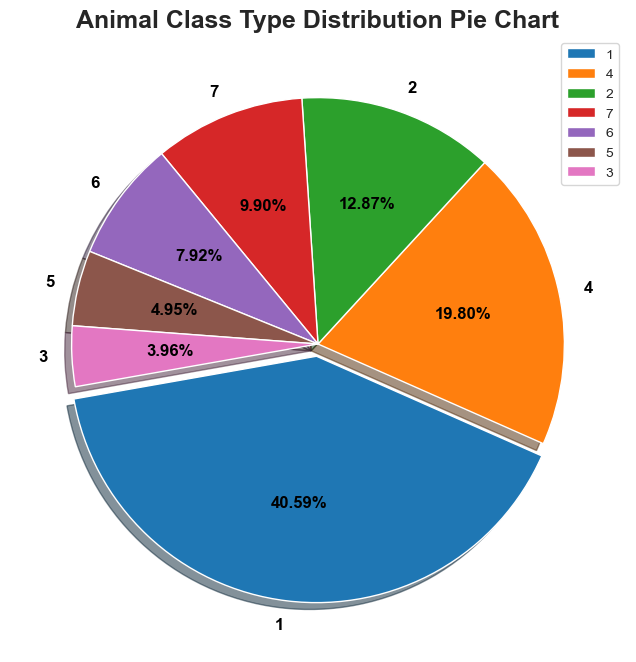

In [74]:
plt.figure(figsize = (12,8))
plt.pie(zoo['type'].value_counts(),
        labels=zoo.type.unique(),
        explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%',
        shadow= True,
        startangle= 190,
        textprops = {'size':'large',
                     'fontweight':'bold',
                     'rotation':0,
                     'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Animal Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Task 1: Analyse the data using visualizations

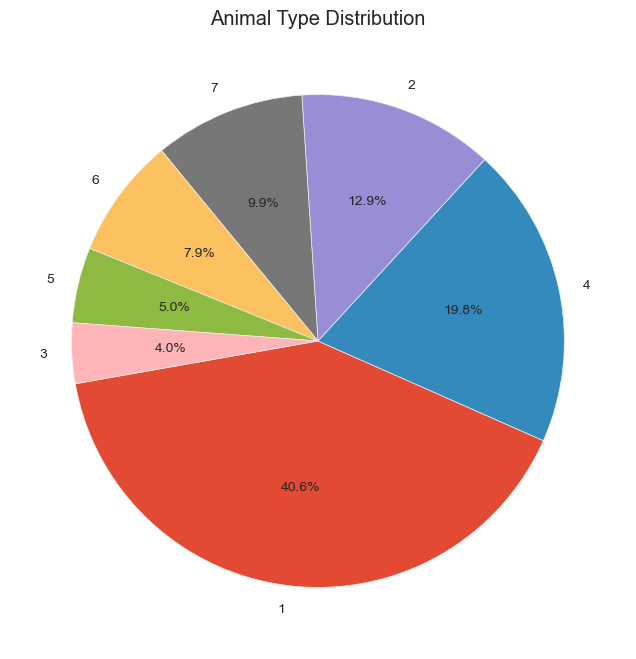

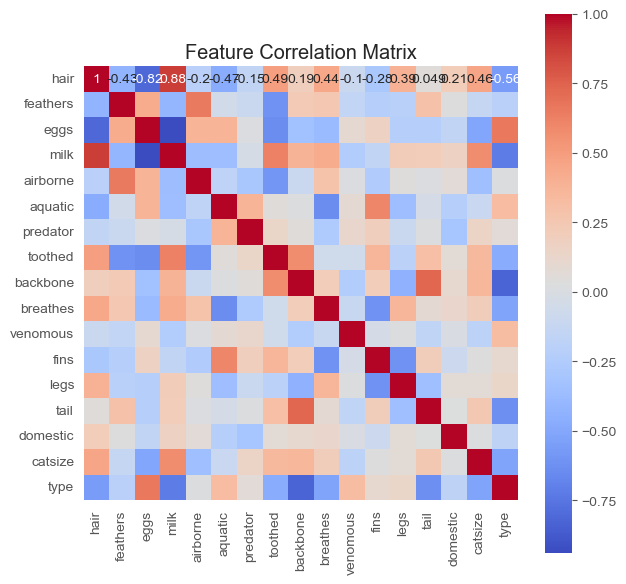

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
zoo = pd.read_csv(r"C:\Users\sai\OneDrive\Documents\Zoo.csv")

# Visualize the distribution of animal types
plt.figure(figsize=(12, 8))
plt.pie(zoo['type'].value_counts(), labels=zoo.type.unique(), autopct='%1.1f%%', startangle=190)
plt.title("Animal Type Distribution")
plt.show()

# Select only numeric columns
numeric_zoo = zoo.select_dtypes(include=[int, float])

# Compute correlation matrix
corr_matrix = numeric_zoo.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Task 2: Preprocess the data

In [80]:
# Select only numeric columns
numeric_zoo = zoo.select_dtypes(include=[int, float])

# Fill missing values with mean
numeric_zoo.fillna(numeric_zoo.mean(), inplace=True)
# Handle outliers (if any)
from scipy import stats
numeric_zoo = numeric_zoo[(np.abs(stats.zscore(numeric_zoo)) < 3).all(axis=1)]

# Task 3: Split the dataset into training and testing sets

In [83]:
from sklearn.model_selection import train_test_split

X = zoo.drop('type', axis=1)  # features
y = zoo['type']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 4: Implement the K-Nearest Neighbours algorithm



In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical values in X_train
X_train_encoded = X_train.copy()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train_encoded[col] = le.fit_transform(X_train[col])

# Encode target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(metric='euclidean')

# Task 6: Evaluate the classifier's performance

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical values in X_test
X_test_encoded = X_test.copy()
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test_encoded[col] = le.fit_transform(X_test[col])

y_pred = knn.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.19047619047619047
Precision: 0.32653061224489793
Recall: 0.19047619047619047
F1-score: 0.24060150375939854


# Task 7: Visualize the decision boundaries



In [94]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Assuming X_train and X_test are your training and testing datasets
X_train = pd.DataFrame({'A': ['a', 'b', 'c', 'a', 'b'], 
                          'B': [1, 2, 3, 1, 2], 
                          'C': ['x', 'y', 'z', 'x', 'y']})

X_test = pd.DataFrame({'A': ['a', 'b', 'c'], 
                        'B': [1, 2, 3], 
                        'C': ['x', 'y', 'z']})

le = LabelEncoder()

# Combine X_train and X_test to fit the LabelEncoder
X_combined = pd.concat([X_train, X_test])

# Fit the LabelEncoder on the combined data
for col in X_combined.columns:
    if X_combined[col].dtype == 'object':
        X_combined[col] = le.fit_transform(X_combined[col])

# Split the combined data back into X_train and X_test
X_train_encoded = X_combined.iloc[:X_train.shape[0], :]
X_test_encoded = X_combined.iloc[X_train.shape[0]:, :]

# Apply StandardScaler to encoded data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("X_train_scaled: \n", X_train_scaled)
print("X_test_scaled: \n", X_test_scaled)

X_train_scaled: 
 [[-1.06904497 -1.06904497 -1.06904497]
 [ 0.26726124  0.26726124  0.26726124]
 [ 1.60356745  1.60356745  1.60356745]
 [-1.06904497 -1.06904497 -1.06904497]
 [ 0.26726124  0.26726124  0.26726124]]
X_test_scaled: 
 [[-1.06904497 -1.06904497 -1.06904497]
 [ 0.26726124  0.26726124  0.26726124]
 [ 1.60356745  1.60356745  1.60356745]]


In [ ]:
Interview Questions:

What are the key hyperparameters in KNN? The key hyperparameters in KNN are:
n_neighbors (K): The number of nearest neighbors to consider.
metric: The distance metric used to calculate the distance between samples. Common metrics include Euclidean, Manhattan, Minkowski, and Cosine.
weights: The weighting scheme used to combine the votes of the nearest neighbors. Common weights include uniform, distance, and custom weights.
What distance metrics can be used in KNN? Some common distance metrics used in KNN include:
Euclidean distance (L2 norm)
Manhattan distance (L1 norm)
Minkowski distance (Lp norm)
Cosine distance
Hamming distance
Jaccard distance
Chebyshev distance